In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from math import pi

In [2]:
##Should make this into an json file 
career_paths = {
    'Applicant_1': {
        'roles': ['Intern', 'Junior Engineer', 'Engineer', 'Senior Engineer'],
        'skills': {
            'Intern': ['Basic Engineering', 'Communication'],
            'Junior Engineer': ['CAD', 'Project Management'],
            'Engineer': ['Advanced CAD', 'Team Collaboration'],
            'Senior Engineer': ['Leadership', 'Mentoring', 'Advanced Engineering'],
        },
        'behavioral_skills': {
            'Emotional Intelligence': 7,
            'Leadership Potential': 8,
            'Communication Skills': 7,
            'Decision-Making': 6,
            'Conflict Resolution': 5,
        },
        'mentoring_experience': ['Junior Engineer'],
        'coaching_received': True,
        'network_influence': 5,
        'career_aspirations': 'Manager',
    },
    'Applicant_2': {
        'roles': ['Intern', 'Junior Engineer', 'Engineer'],
        'skills': {
            'Intern': ['Basic Engineering', 'Time Management'],
            'Junior Engineer': ['CAD', 'Data Analysis'],
            'Engineer': ['Project Management', 'Teamwork'],
        },
        'behavioral_skills': {
            'Emotional Intelligence': 6,
            'Leadership Potential': 7,
            'Communication Skills': 6,
            'Decision-Making': 7,
            'Conflict Resolution': 5,
        },
        'mentoring_experience': [],
        'coaching_received': False,
        'network_influence': 4,
        'career_aspirations': 'Senior Engineer',
    },
    'Applicant_3': {
        'roles': ['Technician', 'Engineer', 'Senior Engineer', 'Team Lead'],
        'skills': {
            'Technician': ['Technical Support', 'Problem Solving'],
            'Engineer': ['System Design', 'Project Coordination'],
            'Senior Engineer': ['Leadership', 'Client Interaction'],
            'Team Lead': ['Team Management', 'Strategic Planning'],
        },
        'behavioral_skills': {
            'Emotional Intelligence': 8,
            'Leadership Potential': 9,
            'Communication Skills': 8,
            'Decision-Making': 8,
            'Conflict Resolution': 7,
        },
        'mentoring_experience': ['Technician', 'Engineer'],
        'coaching_received': True,
        'network_influence': 7,
        'career_aspirations': 'Manager',
    },
    'Applicant_4': {
        'roles': ['Technician', 'Junior Engineer', 'Engineer'],
        'skills': {
            'Technician': ['Troubleshooting', 'Basic Engineering'],
            'Junior Engineer': ['System Design', 'CAD'],
            'Engineer': ['Project Execution', 'Risk Management'],
        },
        'behavioral_skills': {
            'Emotional Intelligence': 5,
            'Leadership Potential': 6,
            'Communication Skills': 6,
            'Decision-Making': 5,
            'Conflict Resolution': 6,
        },
        'mentoring_experience': [],
        'coaching_received': False,
        'network_influence': 3,
        'career_aspirations': 'Senior Engineer',
    },
    'Applicant_5': {
        'roles': ['Engineer', 'Senior Engineer', 'Team Lead'],
        'skills': {
            'Engineer': ['System Analysis', 'Teamwork'],
            'Senior Engineer': ['Leadership', 'Project Leadership'],
            'Team Lead': ['Team Management', 'Mentoring'],
        },
        'behavioral_skills': {
            'Emotional Intelligence': 7,
            'Leadership Potential': 7,
            'Communication Skills': 7,
            'Decision-Making': 6,
            'Conflict Resolution': 6,
        },
        'mentoring_experience': ['Junior Engineer'],
        'coaching_received': True,
        'network_influence': 6,
        'career_aspirations': 'Manager',
    }}

In [3]:
#Same goes to the requirements
# # Desired manager role requirements (roles, skills, and other factors)
manager_requirements = {
    'roles': ['Engineer', 'Senior Engineer', 'Team Lead'],
    'skills': ['Leadership', 'Strategic Planning', 'Team Management'],
    'behavioral_skills': {
        'Emotional Intelligence': 7,
        'Leadership Potential': 8,
        'Communication Skills': 7,
        'Decision-Making': 7,
        'Conflict Resolution': 6,
    },
    'mentoring_experience_required': True,
    'coaching_required': True,
    'network_influence_threshold': 6,
    'career_aspirations': 'Manager',
}

In [4]:
# Function to analyze fit for manager role considering roles, skills, and additional factors
def analyze_fit_for_manager(applicant_data, requirements):
    role_fit_score = sum(role in applicant_data['roles'] for role in requirements['roles']) / len(requirements['roles'])
    # Skill fit score
    skill_fit_score = sum(
        any(skill in applicant_data['skills'].get(role, []) for role in applicant_data['roles'])
        for skill in requirements['skills']
    ) / len(requirements['skills'])
    
    behavioral_fit_score = sum(
        min(applicant_data['behavioral_skills'].get(skill, 0), score) / score 
        for skill, score in requirements['behavioral_skills'].items()
    ) / len(requirements['behavioral_skills'])
    
    mentoring_fit = (requirements['mentoring_experience_required'] == bool(applicant_data['mentoring_experience']))
    coaching_fit = (requirements['coaching_required'] == applicant_data['coaching_received'])
    network_fit = (applicant_data['network_influence'] >= requirements['network_influence_threshold'])
    aspiration_fit = (applicant_data['career_aspirations'] == requirements['career_aspirations'])

    overall_fit = (role_fit_score + skill_fit_score + behavioral_fit_score) / 3
    if mentoring_fit and coaching_fit and network_fit and aspiration_fit:
        overall_fit += 0.2  # Boost for meeting all additional criteria
    
    return overall_fit

In [6]:
# Analyze each applicant's fit for the manager role
fit_scores = {}
for applicant, data in career_paths.items():
    fit_score = analyze_fit_for_manager(data, manager_requirements)
    fit_scores[applicant] = fit_score

In [7]:
# Display the fit scores
print("Fit scores for Manager role:")
for applicant, score in fit_scores.items():
    print(f"{applicant}: {score*100:.2f}% fit")

Fit scores for Manager role:
Applicant_1: 64.60% fit
Applicant_2: 40.60% fit
Applicant_3: 120.00% fit
Applicant_4: 38.02% fit
Applicant_5: 107.10% fit


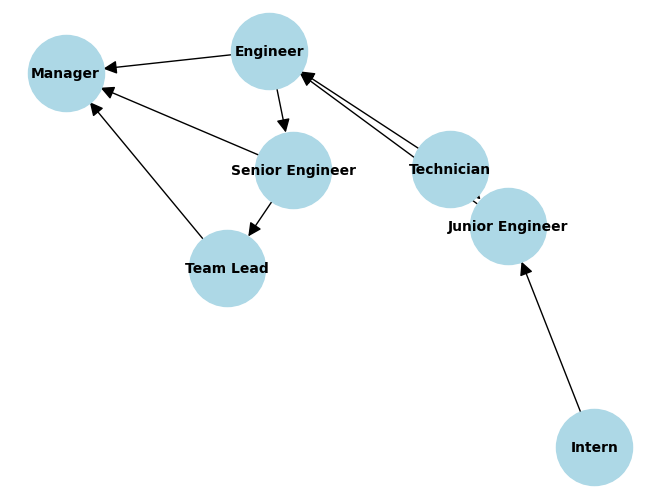

In [8]:
# Visualize the career paths graph
G = nx.DiGraph()
for applicant, data in career_paths.items():
    roles = data['roles']
    for i in range(len(roles) - 1):
        G.add_edge(roles[i], roles[i + 1], applicant=applicant)
    G.add_edge(roles[-1], 'Manager', applicant=applicant)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)


In [9]:
# Highlight paths for an example applicant
applicant_of_interest = 'Applicant_3'
path_edges = [(G[u][v]['applicant'], u, v) for u, v in G.edges if G[u][v]['applicant'] == applicant_of_interest]
path_nodes = set([u for u, v in path_edges] + [v for u, v in path_edges])

nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='lightgreen')
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for _, u, v in path_edges], edge_color='green', width=2)

plt.title('Career Paths and Fit for Manager Role')
plt.show()

ValueError: too many values to unpack (expected 2)

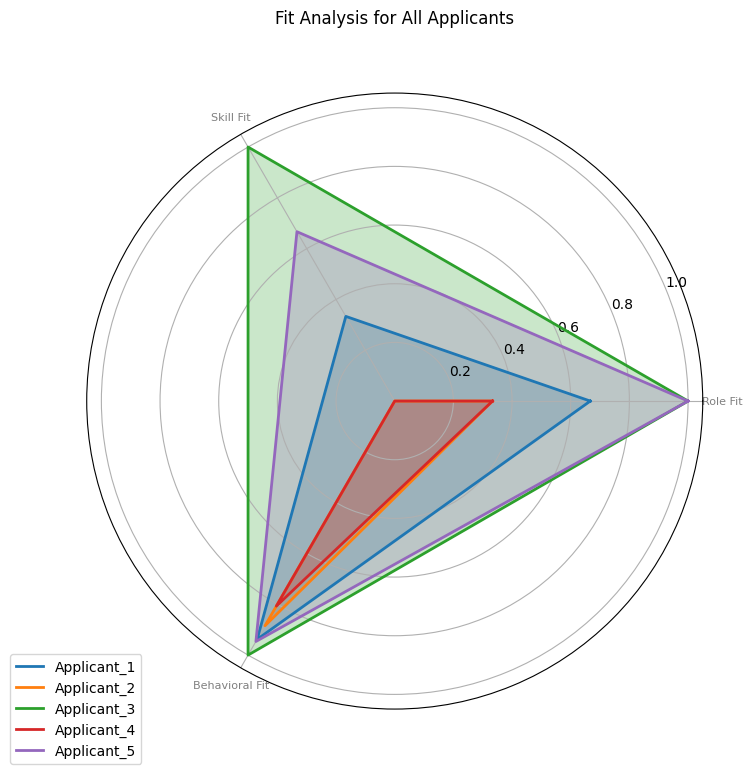

In [10]:
# Define categories for the radar chart
categories = ['Role Fit', 'Skill Fit', 'Behavioral Fit']
num_vars = len(categories)

# Function to calculate fit scores for each applicant
def calculate_fit_scores(applicant_data, requirements):
    role_fit_score = sum(role in applicant_data['roles'] for role in requirements['roles']) / len(requirements['roles'])
    skill_fit_score = sum(
        any(skill in applicant_data['skills'].get(role, []) for role in applicant_data['roles'])
        for skill in requirements['skills']
    ) / len(requirements['skills'])
    behavioral_fit_score = sum(
        min(applicant_data['behavioral_skills'].get(skill, 0), score) / score 
        for skill, score in requirements['behavioral_skills'].items()
    ) / len(requirements['behavioral_skills'])
    
    return [role_fit_score, skill_fit_score, behavioral_fit_score]

# Create a radar chart for all applicants
def create_radar_chart_for_all(applicants_data, requirements):
    # Prepare radar chart
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the loop

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    

     # Plot each applicant's scores
    for applicant, data in applicants_data.items():
        values = calculate_fit_scores(data, requirements)
        values += values[:1]  # Repeat the first value to close the circular graph
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=applicant)
        ax.fill(angles, values, alpha=0.25)
    
    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Fit Analysis for All Applicants", size=12, color='black', y=1.1)
    plt.show()

# Use all applicants' data
create_radar_chart_for_all(career_paths, manager_requirements)

In [11]:
# Define the graph with roles as nodes
G = nx.DiGraph()

# Adding nodes (Roles)
G.add_node("Technician")
G.add_node("Intern")
G.add_node("Junior Engineer")
G.add_node("Engineer")
G.add_node("Senior Engineer")
G.add_node("Team Lead")
G.add_node("Manager")

# Adding edges with skill requirements and weights
G.add_edge("Technician", "Junior Engineer", skills_required=["Basic Engineering"], weight=2)
G.add_edge("Intern", "Junior Engineer", skills_required=["Communication", "Time Management"], weight=1)
G.add_edge("Junior Engineer", "Engineer", skills_required=["Project Management", "CAD"], weight=3)
G.add_edge("Engineer", "Senior Engineer", skills_required=["Mentoring", "Advanced CAD"], weight=4)
G.add_edge("Senior Engineer", "Team Lead", skills_required=["Leadership", "Team Collaboration"], weight=3)
G.add_edge("Team Lead", "Manager", skills_required=["Strategic Planning", "Team Management"], weight=5)

In [12]:
def identify_missing_requirements(applicant, career_graph, requirements):
    current_roles = set(applicant['roles'])
    current_skills = set(skill for role in applicant['roles'] for skill in applicant['skills'].get(role, []))
    
    required_roles = set(requirements['roles'])
    required_skills = set(requirements['skills'])
    
    missing_roles = required_roles - current_roles
    missing_skills = required_skills - current_skills
    
    # Check for additional requirements
    behavioral_gaps = {
        key: max(0, requirements['behavioral_skills'][key] - applicant['behavioral_skills'].get(key, 0))
        for key in requirements['behavioral_skills']
    }
    mentoring_gap = requirements['mentoring_experience_required'] and not applicant['mentoring_experience']
    coaching_gap = requirements['coaching_required'] and not applicant['coaching_received']
    network_gap = max(0, requirements['network_influence_threshold'] - applicant['network_influence'])
    
    # Use graph theory to find the shortest path from the applicant's current role to the Manager role
    current_position = max(current_roles, key=lambda role: nx.shortest_path_length(career_graph, role, "Manager"))
    path_to_manager = nx.shortest_path(career_graph, current_position, "Manager")

    return missing_roles, missing_skills, behavioral_gaps, mentoring_gap, coaching_gap, network_gap, path_to_manager

Analyzing Applicant_1...

Applicant: Applicant_1
Missing Roles: {'Team Lead'}
Missing Skills: {'Team Management', 'Strategic Planning'}
Behavioral Gaps: {'Emotional Intelligence': 0, 'Leadership Potential': 0, 'Communication Skills': 0, 'Decision-Making': 1, 'Conflict Resolution': 1}
Mentoring Gap: False
Coaching Gap: False
Network Influence Gap: 1
Path to Manager: ['Intern', 'Junior Engineer', 'Engineer', 'Senior Engineer', 'Team Lead', 'Manager']



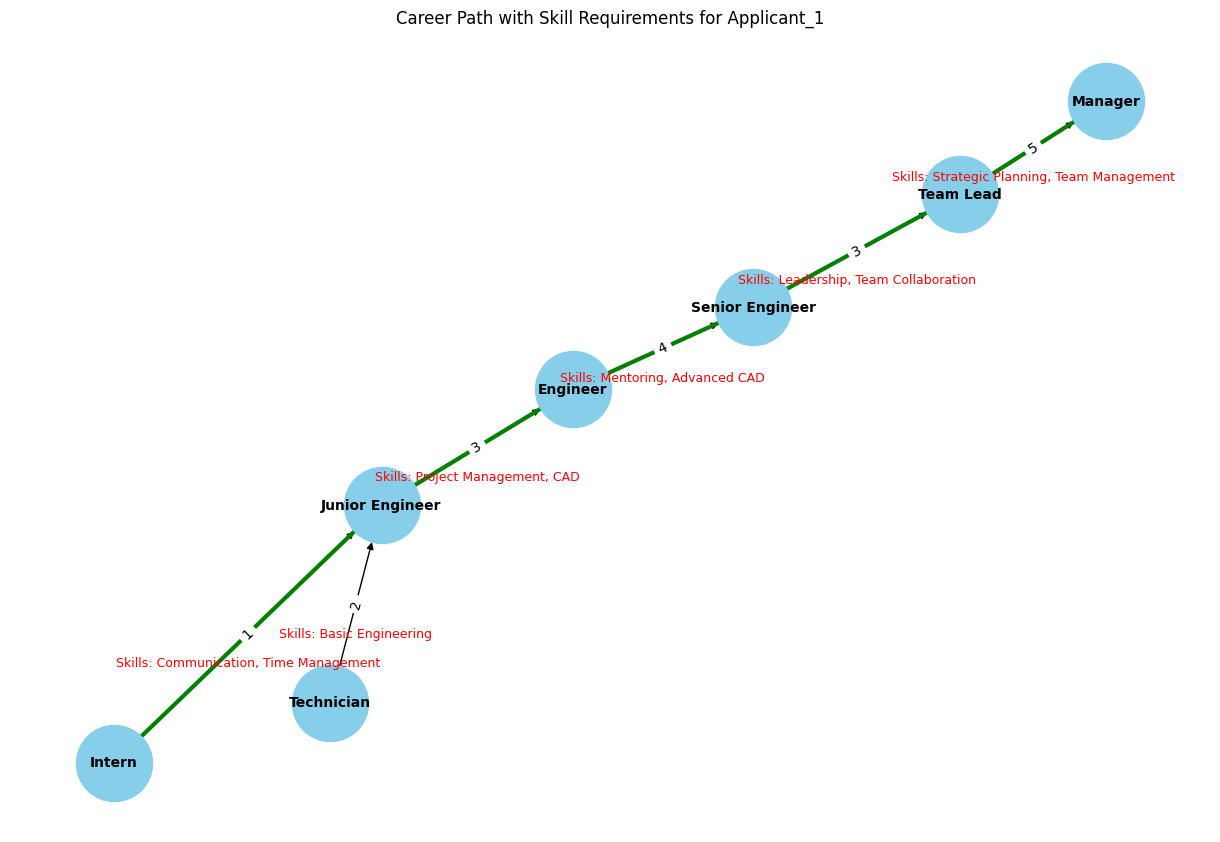

Analyzing Applicant_2...

Applicant: Applicant_2
Missing Roles: {'Senior Engineer', 'Team Lead'}
Missing Skills: {'Leadership', 'Team Management', 'Strategic Planning'}
Behavioral Gaps: {'Emotional Intelligence': 1, 'Leadership Potential': 1, 'Communication Skills': 1, 'Decision-Making': 0, 'Conflict Resolution': 1}
Mentoring Gap: True
Coaching Gap: True
Network Influence Gap: 2
Path to Manager: ['Intern', 'Junior Engineer', 'Engineer', 'Senior Engineer', 'Team Lead', 'Manager']



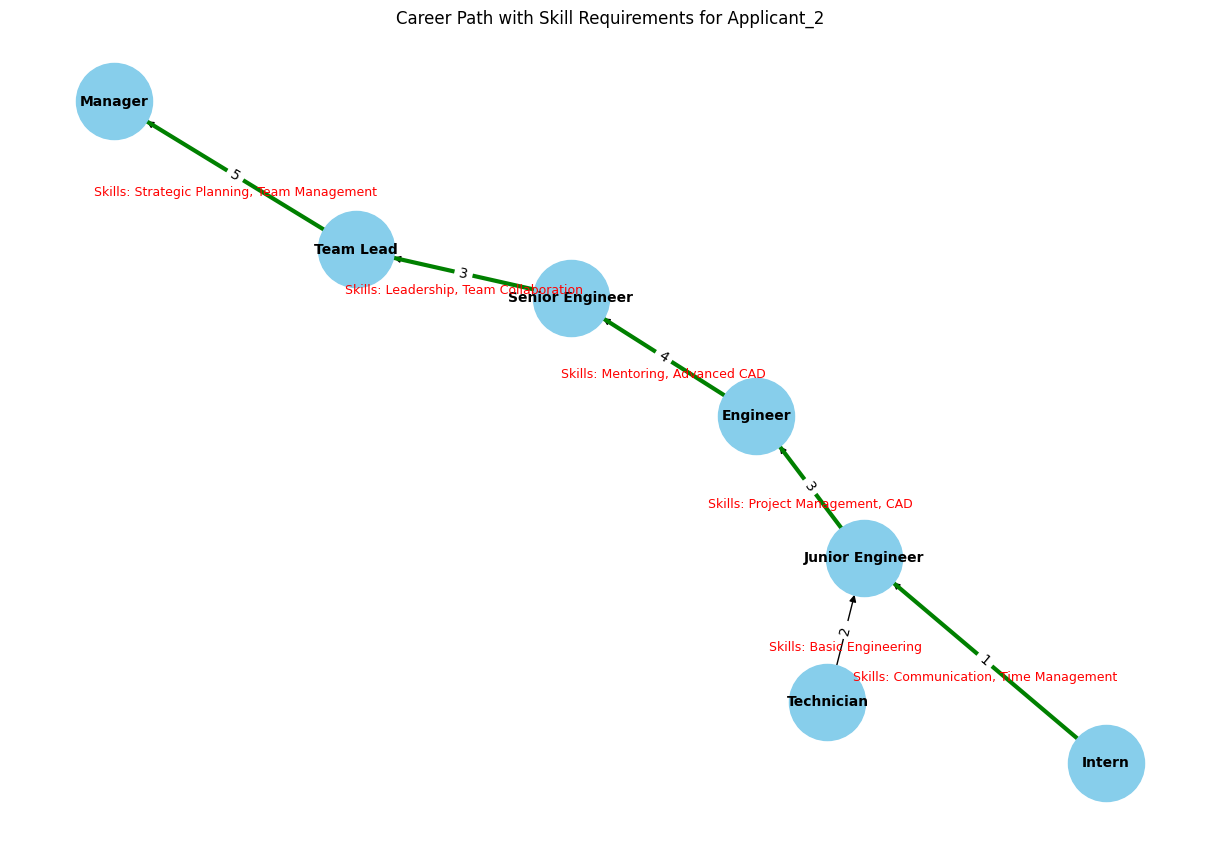

Analyzing Applicant_3...

Applicant: Applicant_3
Missing Roles: set()
Missing Skills: set()
Behavioral Gaps: {'Emotional Intelligence': 0, 'Leadership Potential': 0, 'Communication Skills': 0, 'Decision-Making': 0, 'Conflict Resolution': 0}
Mentoring Gap: False
Coaching Gap: False
Network Influence Gap: 0
Path to Manager: ['Technician', 'Junior Engineer', 'Engineer', 'Senior Engineer', 'Team Lead', 'Manager']



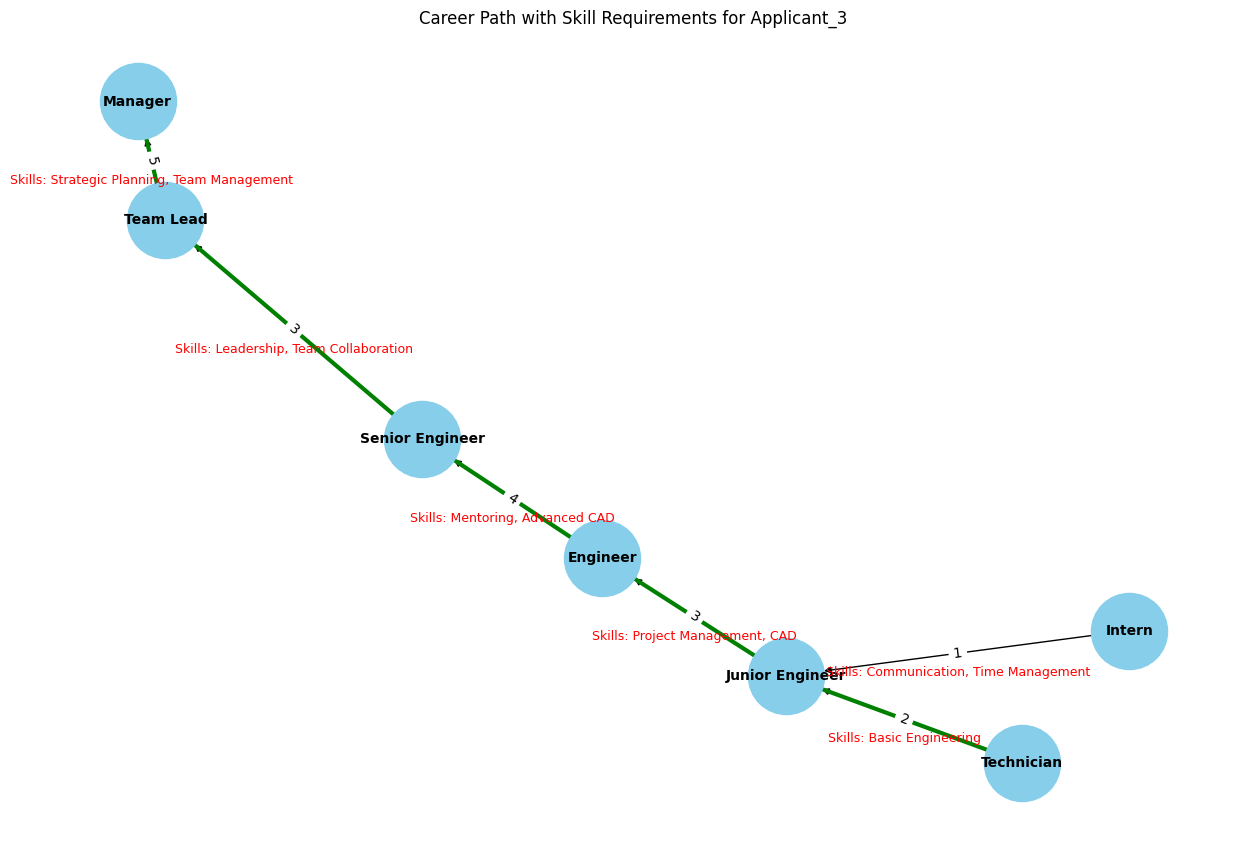

Analyzing Applicant_4...

Applicant: Applicant_4
Missing Roles: {'Senior Engineer', 'Team Lead'}
Missing Skills: {'Leadership', 'Team Management', 'Strategic Planning'}
Behavioral Gaps: {'Emotional Intelligence': 2, 'Leadership Potential': 2, 'Communication Skills': 1, 'Decision-Making': 2, 'Conflict Resolution': 0}
Mentoring Gap: True
Coaching Gap: True
Network Influence Gap: 3
Path to Manager: ['Technician', 'Junior Engineer', 'Engineer', 'Senior Engineer', 'Team Lead', 'Manager']



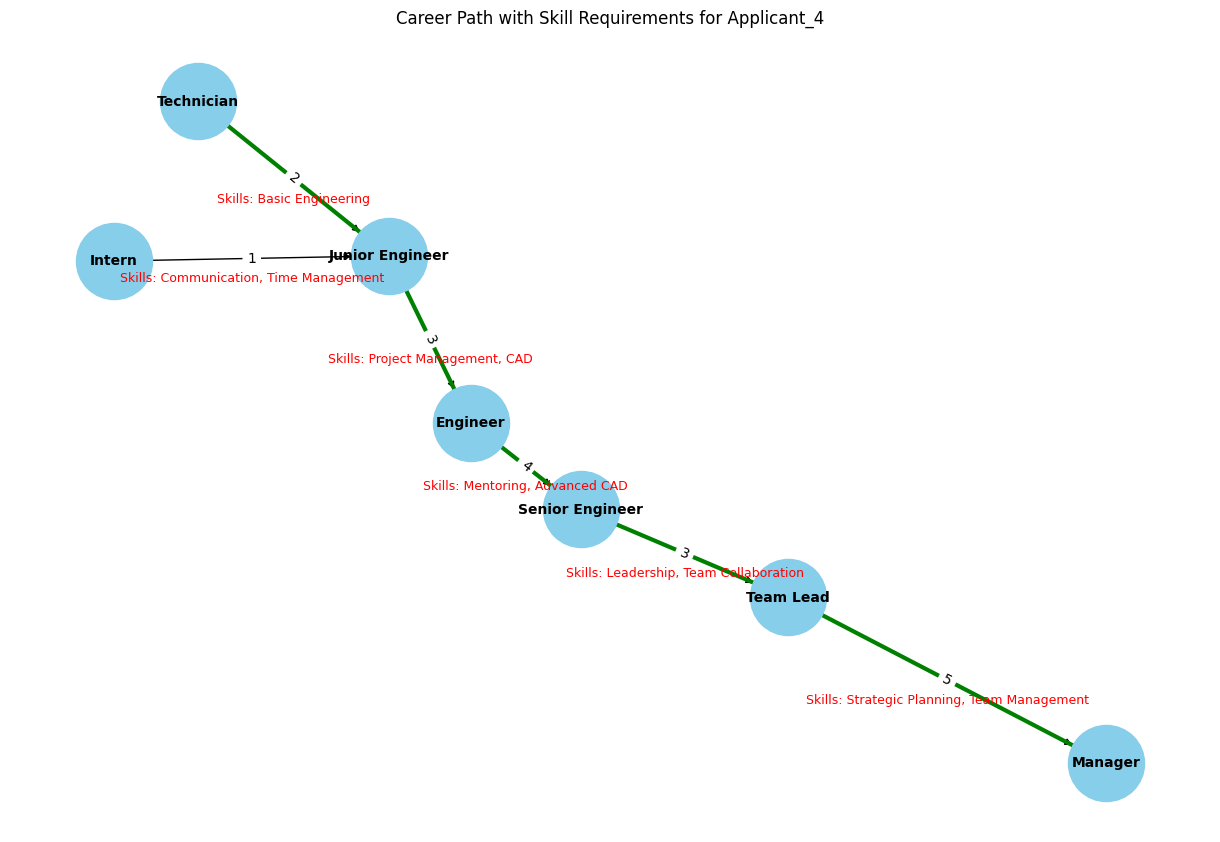

Analyzing Applicant_5...

Applicant: Applicant_5
Missing Roles: set()
Missing Skills: {'Strategic Planning'}
Behavioral Gaps: {'Emotional Intelligence': 0, 'Leadership Potential': 1, 'Communication Skills': 0, 'Decision-Making': 1, 'Conflict Resolution': 0}
Mentoring Gap: False
Coaching Gap: False
Network Influence Gap: 0
Path to Manager: ['Engineer', 'Senior Engineer', 'Team Lead', 'Manager']



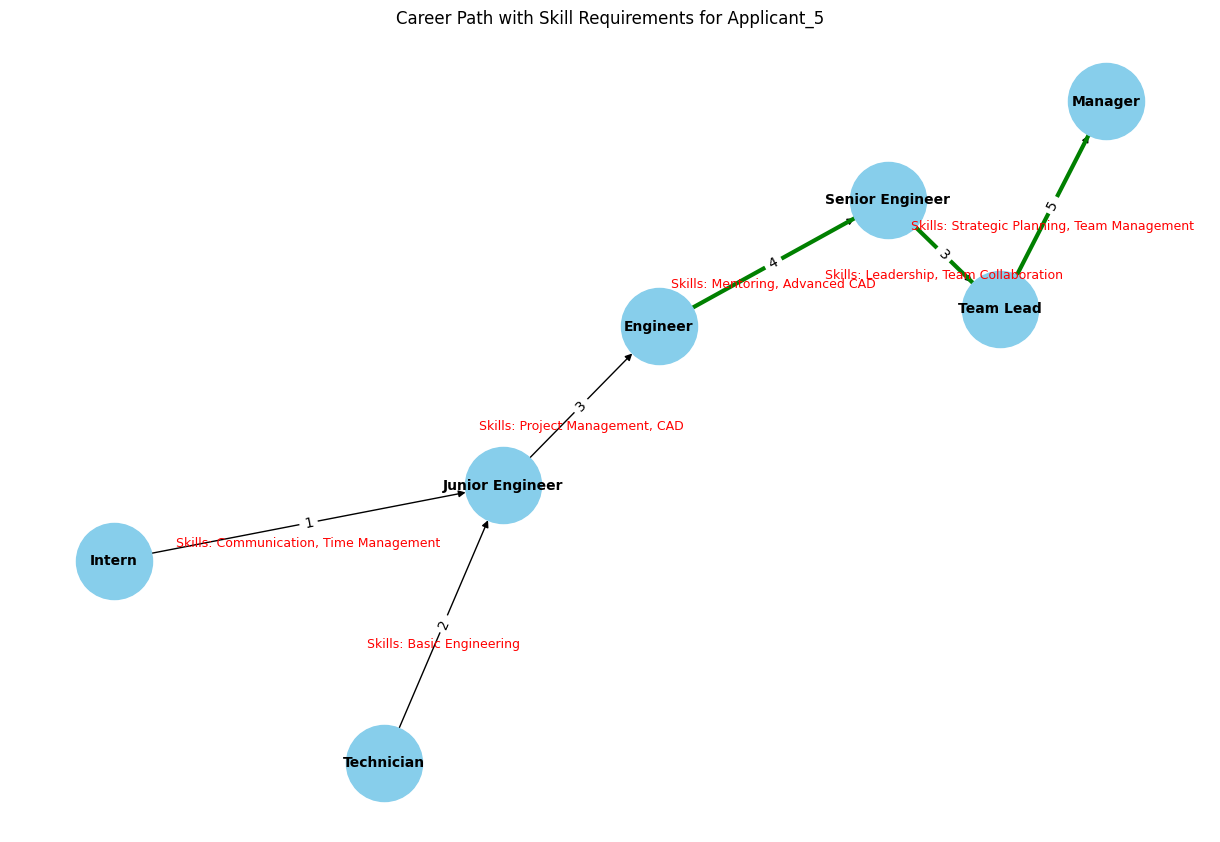

In [13]:
# Analyze and visualize the requirements for each applicant
for applicant_name, applicant_data in career_paths.items():
    print(f"Analyzing {applicant_name}...\n")
    missing_roles, missing_skills, behavioral_gaps, mentoring_gap, coaching_gap, network_gap, path_to_manager = identify_missing_requirements(applicant_data, G, manager_requirements)

    # Display the results for each applicant
    print(f"Applicant: {applicant_name}")
    print(f"Missing Roles: {missing_roles}")
    print(f"Missing Skills: {missing_skills}")
    print(f"Behavioral Gaps: {behavioral_gaps}")
    print(f"Mentoring Gap: {mentoring_gap}")
    print(f"Coaching Gap: {coaching_gap}")
    print(f"Network Influence Gap: {network_gap}")
    print(f"Path to Manager: {path_to_manager}\n")

    # Visualize the graph and the applicant's path
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight="bold", arrows=True)

    # Highlight the path to the Manager role for the applicant
    path_edges = list(zip(path_to_manager, path_to_manager[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)

    # Annotate the edges with weights in the middle and skills directly below the edges as captions
    edge_weights = nx.get_edge_attributes(G, 'weight')
    edge_skills = nx.get_edge_attributes(G, 'skills_required')

    formatted_edge_skills = {edge: f"Skills: {', '.join(skills)}" for edge, skills in edge_skills.items()}

    # Draw weights in the middle of the edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, label_pos=0.5, font_color='black', font_size=10)

    # Draw skills as captions directly below the edges
    for (n1, n2), label in formatted_edge_skills.items():
        x1, y1 = pos[n1]
        x2, y2 = pos[n2]
        plt.text((x1 + x2) / 2, (y1 + y2) / 2 - 0.05, label, horizontalalignment='center', verticalalignment='center', fontsize=9, color='red')

    plt.title(f"Career Path with Skill Requirements for {applicant_name}")
    plt.show()
